<a href="https://colab.research.google.com/github/gauthamkn/accidental-analysis-using-random-forest/blob/main/dapmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Imports & Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# 2. Load Dataset from Google Colab (Manual Upload)
from google.colab import files
uploaded = files.upload()  # Upload the CSV file manually

import io
df = pd.read_csv(io.BytesIO(uploaded['RTA Dataset.csv']))

Saving RTA Dataset.csv to RTA Dataset.csv


In [ ]:
#3. Initial Data Exploration
print("Dataset Info:")
print(df.info())

print("\nFirst few rows:")
print(df.head())
# 4. Clean Missing Values
df.dropna(inplace=True)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment  


Unique Accident Types:
Accident_severity
Slight Injury     2466
Serious Injury     392
Fatal injury        31
Name: count, dtype: int64


<ipython-input-5-9a18c55b0ea6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_severity', data=df, palette='Set2')


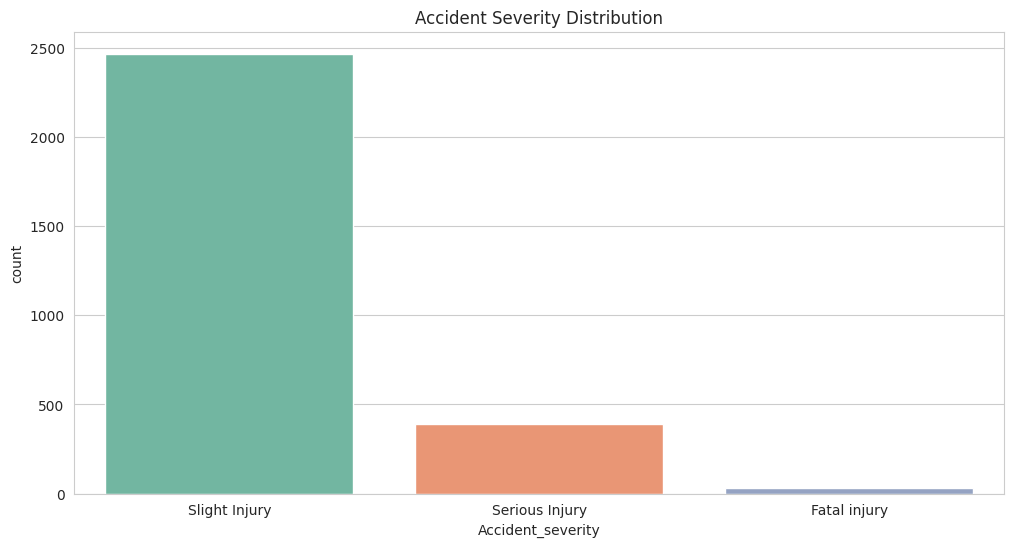

In [ ]:
# 5. Basic Distribution: Accident Severity
print("\nUnique Accident Types:")
print(df['Accident_severity'].value_counts())

sns.countplot(x='Accident_severity', data=df, palette='Set2')
plt.title("Accident Severity Distribution")
plt.show()



Top 10 Accident Areas:
Area_accident_occured
Other                   965
Office areas            663
Residential areas       524
 Church areas           313
 Industrial areas       116
School areas            104
 Outside rural areas     70
  Recreational areas     53
 Hospital areas          31
Rural village areas      24
Name: count, dtype: int64


<ipython-input-6-ad4e27584349>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Area_accident_occured',


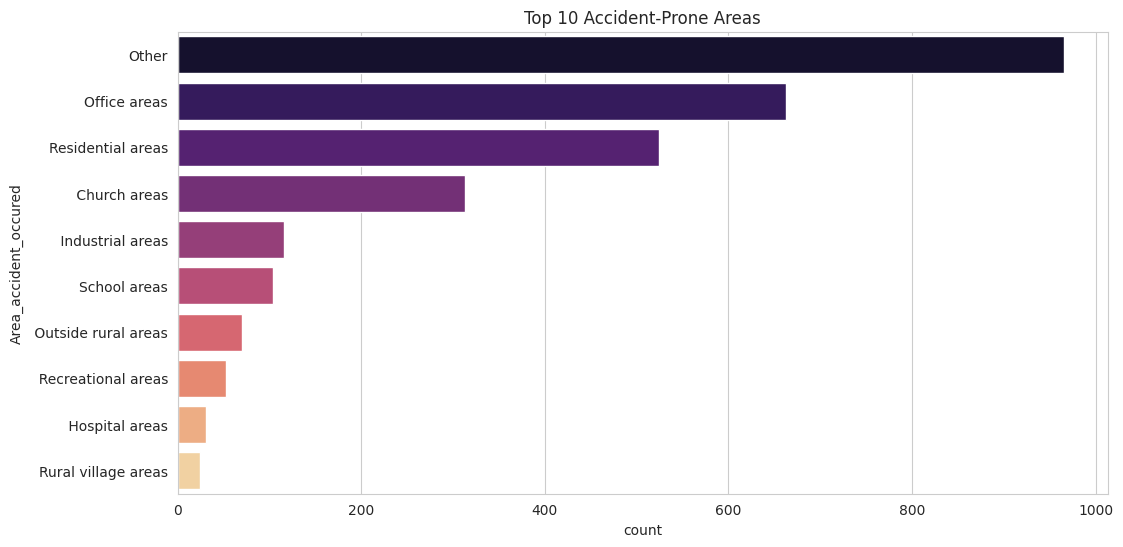

In [ ]:
# 6. Top 10 Accident Areas
if 'Area_accident_occured' in df.columns:
    top_areas = df['Area_accident_occured'].value_counts().head(10)
    print("\nTop 10 Accident Areas:")
    print(top_areas)

    sns.countplot(y='Area_accident_occured',
                  data=df,
                  order=top_areas.index,
                  palette='magma')
    plt.title("Top 10 Accident-Prone Areas")
    plt.show()



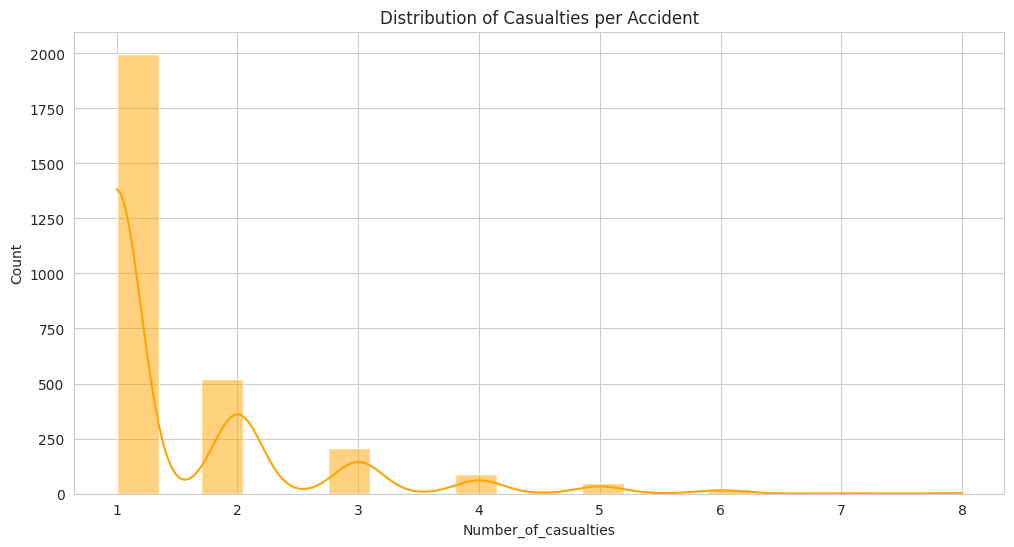

In [ ]:
if 'Number_of_casualties' in df.columns:
    sns.histplot(df['Number_of_casualties'], kde=True, bins=20, color='orange')
    plt.title("Distribution of Casualties per Accident")
    plt.show()

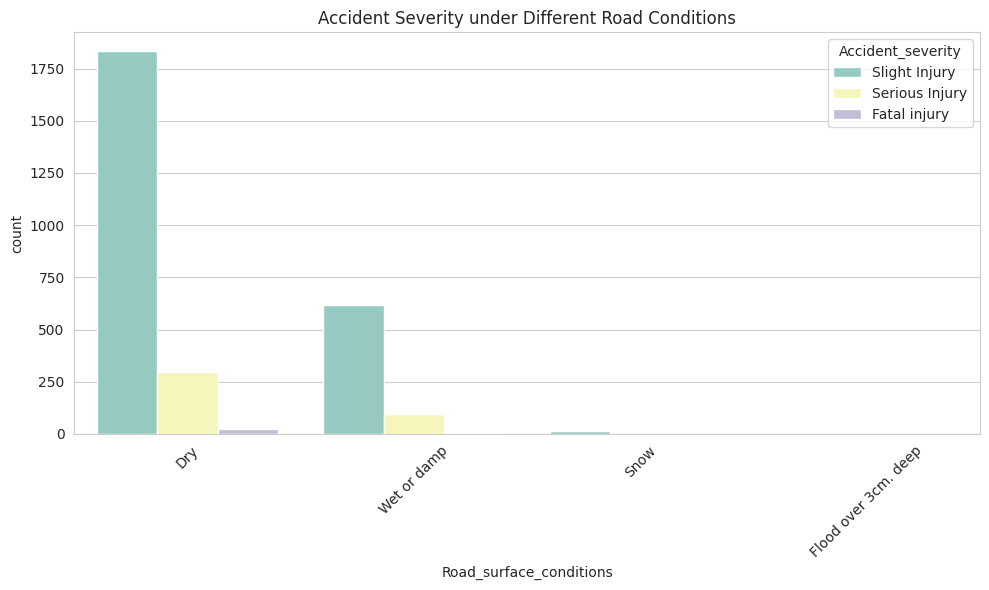

In [ ]:
if 'Road_surface_conditions' in df.columns and 'Accident_severity' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Road_surface_conditions', hue='Accident_severity', palette='Set3')
    plt.title("Accident Severity under Different Road Conditions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

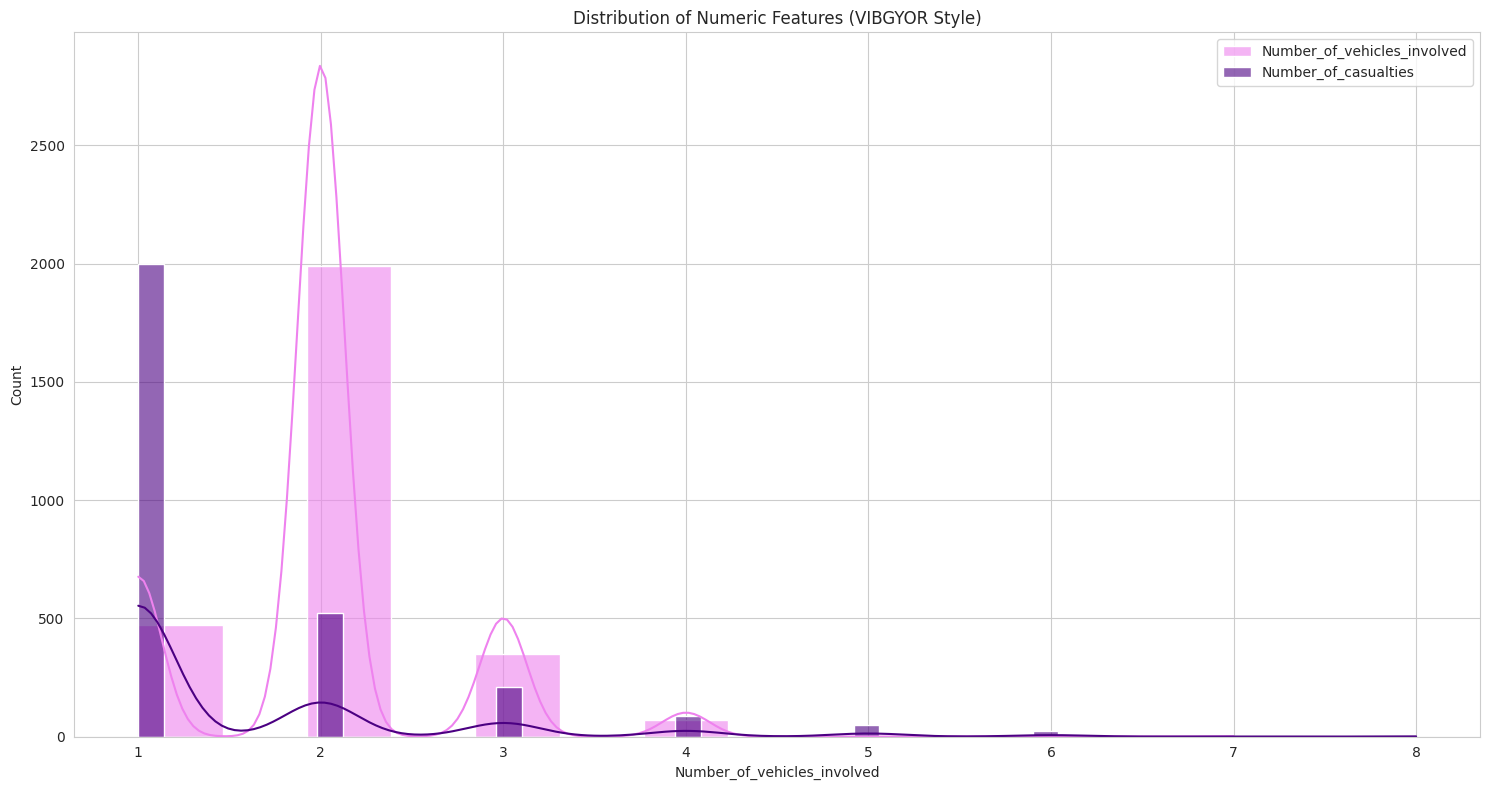

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 8))
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red', 'purple']

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color=colors[i % len(colors)], label=col, alpha=0.6)

plt.title("Distribution of Numeric Features (VIBGYOR Style)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
df_model = df.copy()
label_encoders = {}

for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Step 2: Prepare features and target
target = 'Number_of_casualties'
X = df_model.drop(columns=[target])
y = df_model[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)





LinearRegression()

In [ ]:
# Step 6: Evaluate Model
y_pred = lr_model.predict(X_test_scaled)

print("\n📊 Linear Regression Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


# Custom Accuracy: Percentage of predictions within 10% of the actual value
tolerance = 0.10  # 10%
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance * np.abs(y_test)) * 100
print("Custom Accuracy (within 10% tolerance): {:.2f}%".format(accuracy))


📊 Linear Regression Model Evaluation:
R² Score: 0.09041179812940414
Mean Absolute Error: 0.6929619490997645
Custom Accuracy (within 10% tolerance): 6.06%


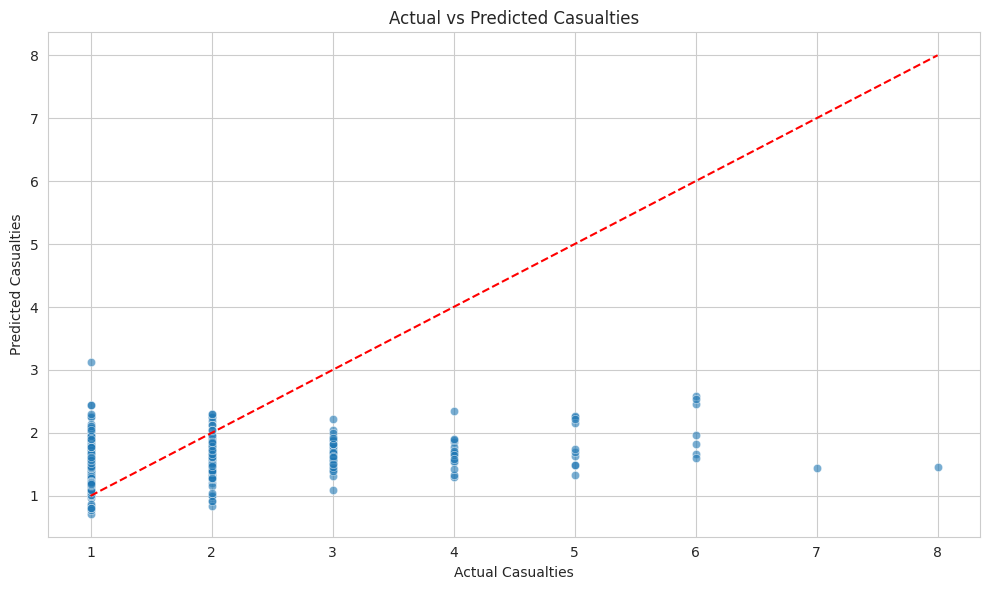

In [ ]:
# Step 7: Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Casualties")
plt.ylabel("Predicted Casualties")
plt.title("Actual vs Predicted Casualties")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


Confusion Matrix:
[[   0    0   37]
 [   0    8  355]
 [   0    0 2064]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       1.00      0.02      0.04       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.61      0.34      0.32      2464
weighted avg       0.85      0.84      0.77      2464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


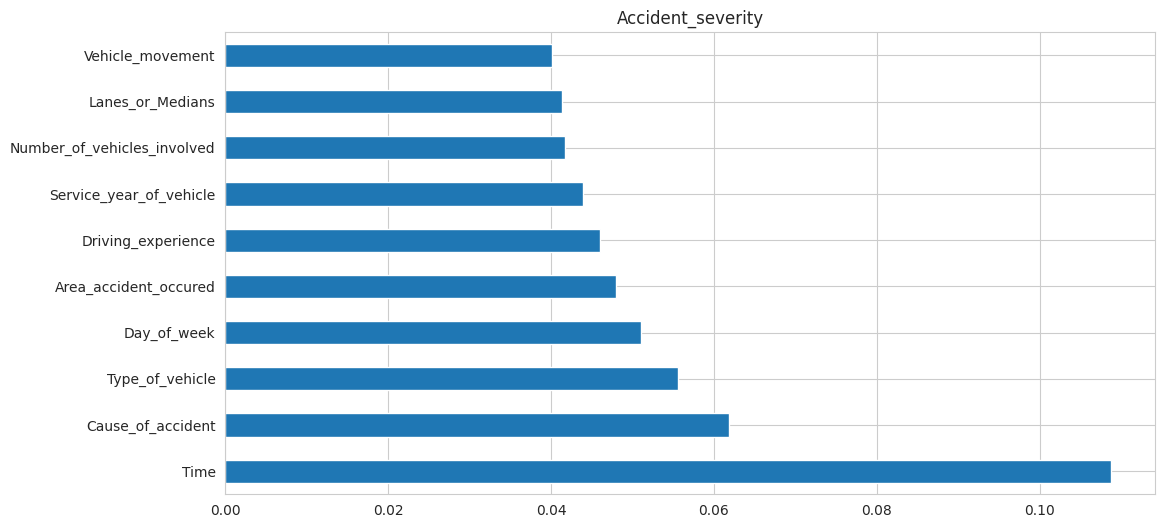

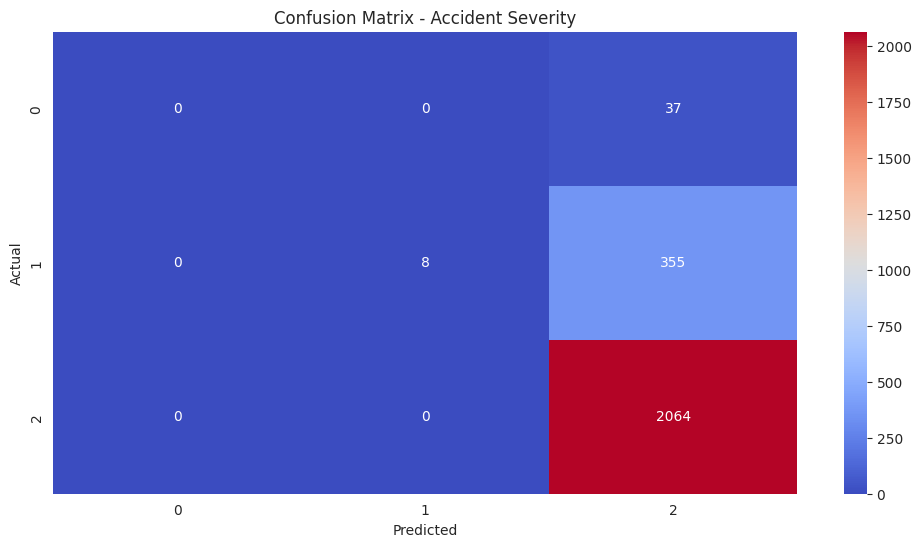

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df_model = df.copy()

label_encoders = {}
for col in df_model.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Step 2: Features & Target
target = 'Accident_severity'
features = df_model.drop(columns=[target])
X = features
y = df_model[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluation
y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance

feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Accident_severity")
plt.show()




Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       1.00      0.02      0.04       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.61      0.34      0.32      2464
  weighted avg       0.85      0.84      0.77      2464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


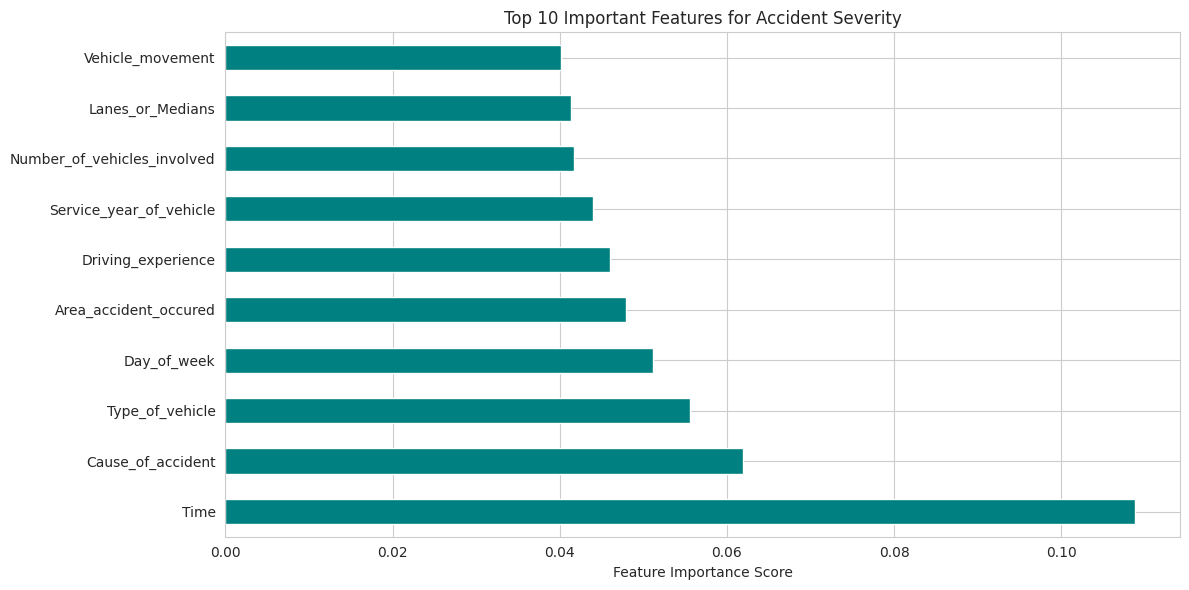

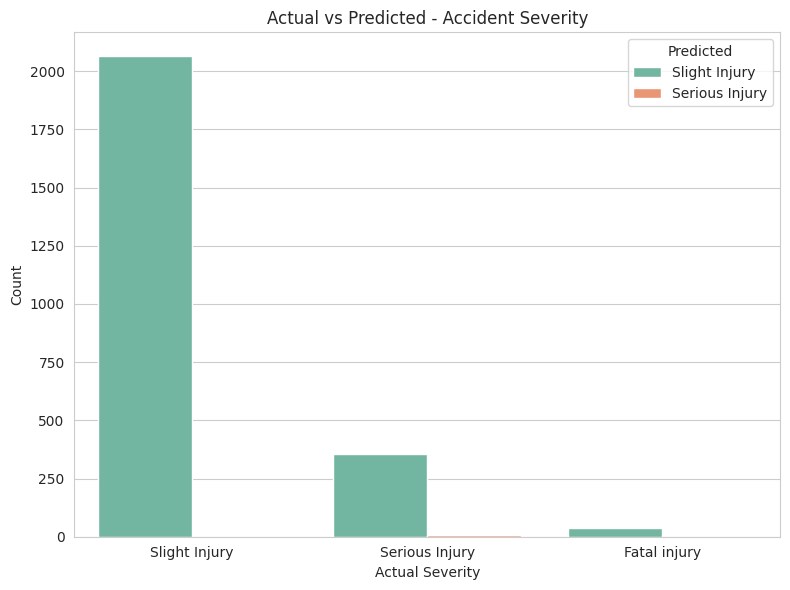

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Copy and encode
df_model = df.copy()
label_encoders = {}

for col in df_model.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Target & features
target = 'Accident_severity'
features = df_model.drop(columns=[target])
X = features
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)



#  Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders[target].classes_))

#  Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features for Accident Severity")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()

#  Countplot: Actual vs Predicted Comparison
actual_names = label_encoders[target].inverse_transform(y_test)
pred_names = label_encoders[target].inverse_transform(y_pred)

compare_df = pd.DataFrame({'Actual': actual_names, 'Predicted': pred_names})

plt.figure(figsize=(8, 6))
sns.countplot(data=compare_df, x='Actual', hue='Predicted', palette='Set2')
plt.title("Actual vs Predicted - Accident Severity")
plt.xlabel("Actual Severity")
plt.ylabel("Count")
plt.legend(title="Predicted")
plt.tight_layout()
plt.show()